# Quantum Half-Substractor, Full substractor



Estas operacioens son familiares en circuitos digitales,  pero peuden ser llevadas al cómputo cuántic.
https://www.youtube.com/watch?v=SV4VTYWxKV4&ab_channel=NesoAcademy

https://qiskit.org/textbook/ch-states/atoms-computation.html

https://quantumcomputing.stackexchange.com/questions/1654/how-do-i-add-11-using-a-quantum-computer

In [25]:
from qiskit import *
import qiskit.visualization as visualization
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random 
sns.set_theme()

In [26]:
backend = Aer.get_backend('statevector_simulator')

In [27]:
def getBloch(quantumC):
    return visualization.plot_bloch_multivector(execute(quantumC, backend).result()\
        .get_statevector())

SyntaxError: incomplete input (2517921269.py, line 2)

In [28]:
def stateGenerator(state):
    state = state[::-1]
    current = int(state, 2)
    newState = [0 for i in range(0, 2**(len(state)))]
    newState[current] = 1
    return newState

In [29]:
def getMeasure(quantumC, n):
    measures = []
    for i in range(0, n):
        outcome = execute(quantumC, backend).result()
        hist = outcome.get_counts()
        for i in hist.keys():
            measures.append(i)
    return measures

In [30]:
def makeCirc(n, m):
    initState = ''
    for i in range(0, n-m):
        initState += str(random.randint(0, 1))
    for i in range(0, m):
        initState += str(0)
    print(initState)
    qr = QuantumRegister(n)
    qc = ClassicalRegister(n)
    circ = QuantumCircuit(qr, qc)
    initializedState = stateGenerator(initState)
    circ.initialize(initializedState, qr)
    return circ

In [31]:
circ = makeCirc(4, 1)
#getBloch(circ)

0000


In [32]:
circ.csx(1, 3)
circ.cx(0, 1)
circ.csx(2, 3)
circ.csx(0, 3)
circ.cx(1, 2)
circ.crx(-np.pi/2, 2, 3)

for i in range(0, 4):
    circ.measure(i, i)

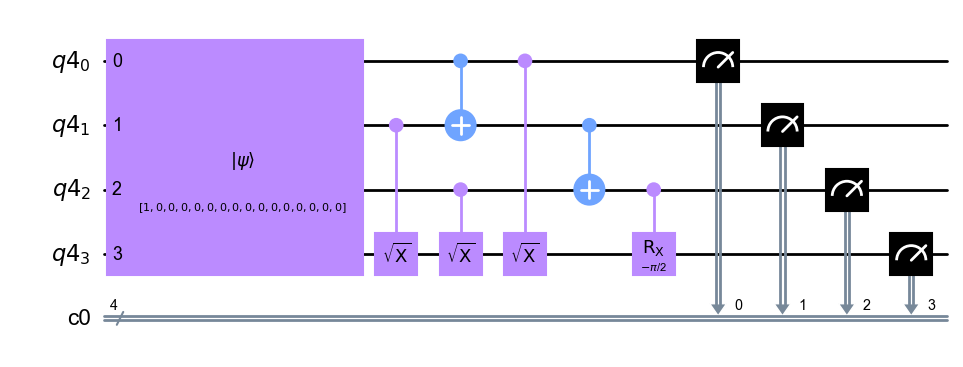

In [33]:
circ.draw('mpl')

In [34]:
getMeasure(circ, 1)[0][::-1]

'0000'

In [39]:
circ = QuantumCircuit(4)
circ.csx(1, 3)
circ.cx(0, 1)
circ.csx(2, 3)
circ.csx(0, 3)
circ.cx(1, 2)
circ.crx(-np.pi/2, 2, 3)

In [40]:
fullAdder = circ.to_gate(label=' Adder')

In [41]:
circ2 = QuantumCircuit(8)
circ2.append(fullAdder, [0, 1, 2, 3])

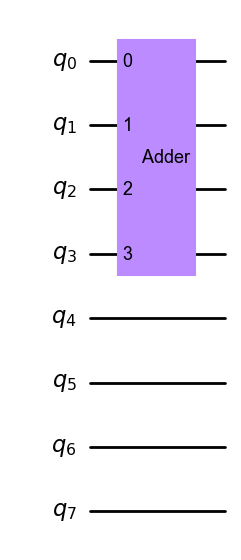

In [42]:
circ2.draw('mpl')